# Mapping

In [452]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [413]:
image1 = np.load('/home/mouloud/Desktop/image1.npy')
image2 = np.load('/home/mouloud/Desktop/image2.npy')

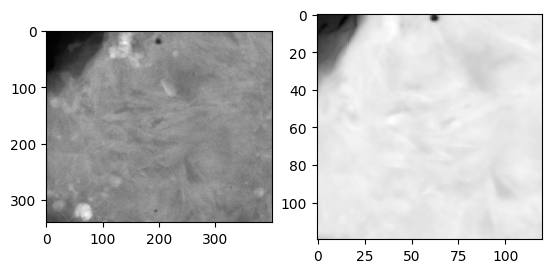

In [414]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image1)
ax[1].imshow(image2)

In [415]:
# Image 1 should be cropped and transformed to match image 2

## Skimage similarity transform

In [93]:
from skimage import transform

In [417]:
image1.shape

(340, 400)

In [419]:
# Cropping image 1
image1 = image1[:,:340]
image1.shape

(340, 340)

In [420]:
# import a transformation that upscales the first image instead of binning the second image
import skimage.transform.pyramids as px

In [422]:
upscale_factor = image1.shape[0]/image2.shape[0]
upscale_factor

2.8333333333333335

In [425]:
image2 = px.pyramid_expand(image2, upscale=upscale_factor)

In [428]:
image1.shape, image2.shape

((340, 340), (340, 340))

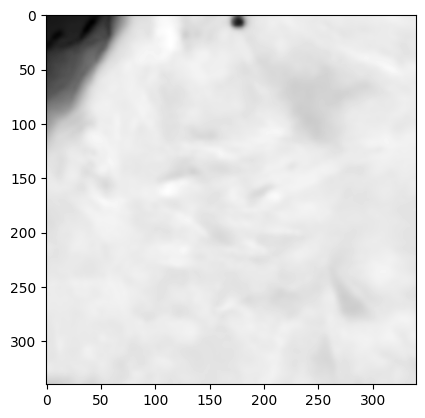

In [429]:
plt.imshow(image2)

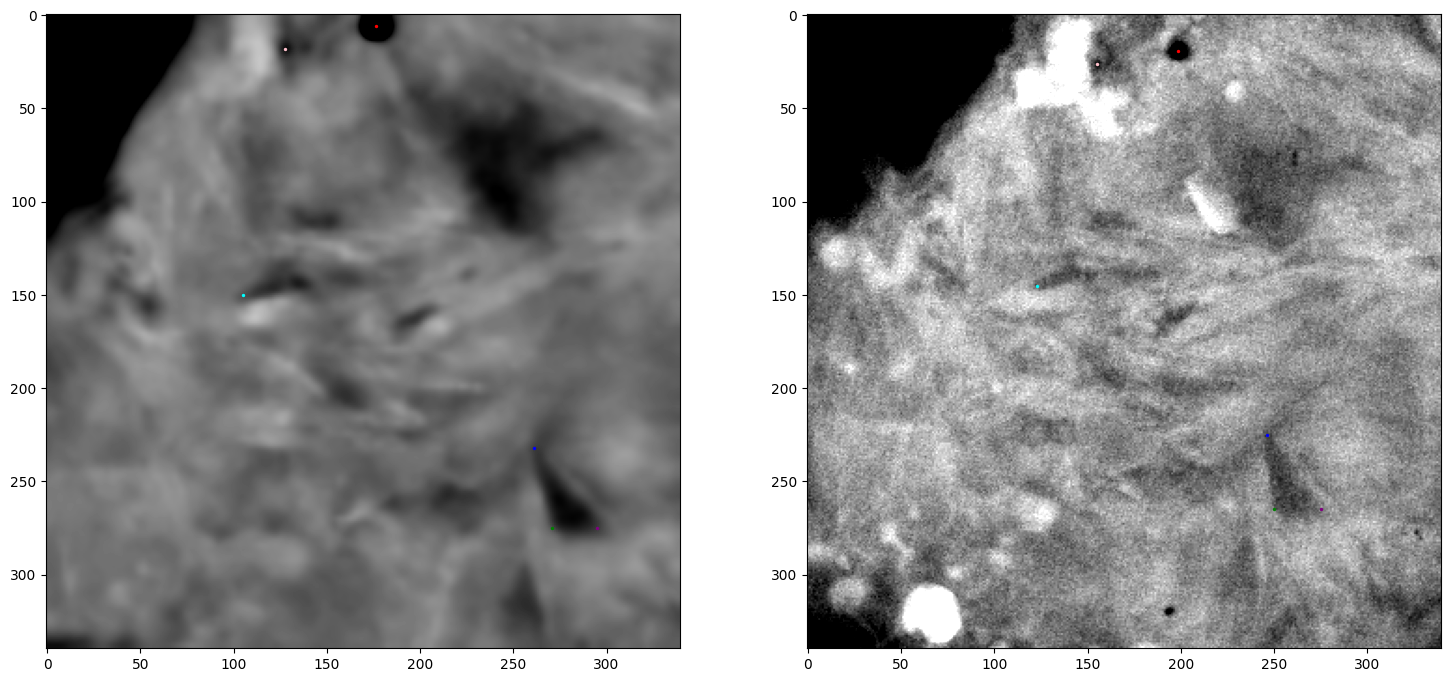

In [430]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,15))

ax[0].imshow(image2, vmin = 1.9e5, vmax = 2.5e5)
ax[1].imshow(image1, vmin = 2800, vmax = 3500)

src = np.array([[176.5,6],[261,232],[271,275],[295,275],[105,150],[127.5,18]])
dst = np.array([[198.5,19],[246,225],[250,265],[275,265],[123,145],[155,26]])
colors = ["red", "blue", "green", "purple", "cyan", "pink"]


for i in range(len(src)):
    ax[0].scatter(src[i][0], src[i][1],s=2,c = colors[i]);
    ax[1].scatter(dst[i][0], dst[i][1], s=2,c = colors[i]);

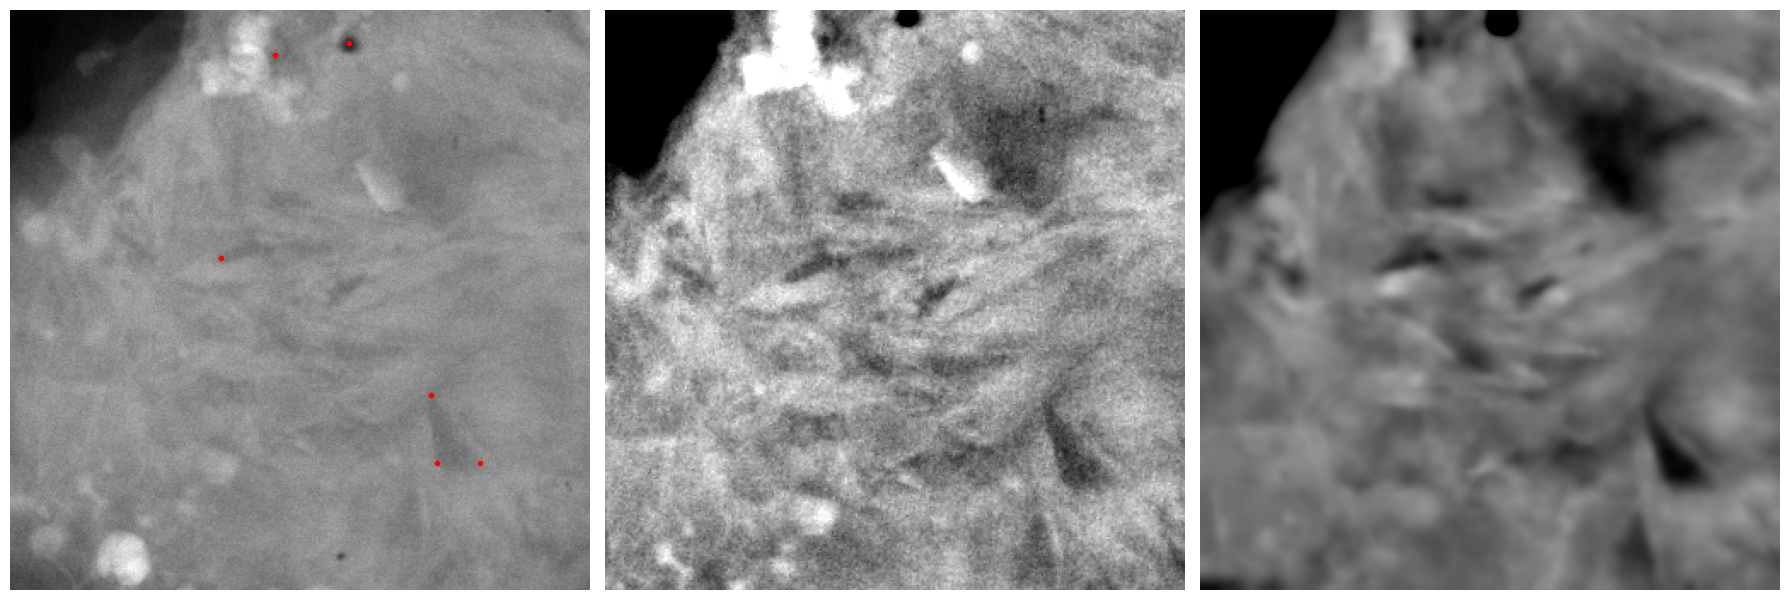

In [431]:
tform3 = transform.SimilarityTransform()
tform3.estimate(src, dst)

warped = transform.warp(image1, tform3, output_shape=(340, 340))

fig, ax = plt.subplots(ncols=3, figsize=(18, 13))

ax[0].imshow(image1, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray, vmin = 2800, vmax = 3500)
ax[2].imshow(image2, cmap=plt.cm.gray, vmin = 1.9e5, vmax = 2.5e5)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

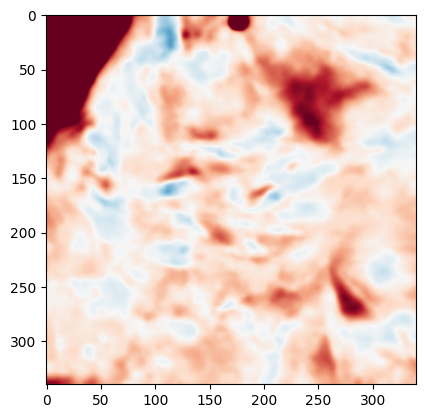

In [448]:
plt.imshow(warped, cmap=plt.cm.viridis, vmin = 2800, vmax = 3500)
plt.imshow(image2, cmap=plt.cm.RdBu, vmin = 1.9e5, vmax = 2.5e5, alpha=1)

# Export the transformation

In [449]:
tform3

<SimilarityTransform(matrix=
    [[ 0.86580594, -0.10025228, 45.53417285],
     [ 0.10025228,  0.86580594, -1.1037155 ],
     [ 0.        ,  0.        ,  1.        ]]) at 0x7f367199b760>

### The transformation matrix to export 

In [451]:
matrix = tform3.params
transform.SimilarityTransform(matrix=matrix) # This is what you need along with the matrix

<SimilarityTransform(matrix=
    [[ 0.86580594, -0.10025228, 45.53417285],
     [ 0.10025228,  0.86580594, -1.1037155 ],
     [ 0.        ,  0.        ,  1.        ]]) at 0x7f3671005cc0>

______________________________________
**The end**